In [3]:
with open('osativa_H.gene_type', 'r') as f:
    lines = f.readlines()
data = []
for line in lines:
    line = line.strip()
    data.append(line.split('\t'))

for i in range(len(data)):
    data[i][1] = int(data[i][1])

In [4]:
type_dict = {
    "Singleton": 0,
    "Dispersed": 1,
    "Proximal": 2,
    "Tandem": 3,
    "WGD_or_segmental": 4
}

In [22]:
# statistics
singleton_subset = [item for item in data if item[1] == type_dict["Singleton"]]
dispersed_subset = [item for item in data if item[1] == type_dict["Dispersed"]]
proximal_subset = [item for item in data if item[1] == type_dict["Proximal"]]
tandem_subset = [item for item in data if item[1] == type_dict["Tandem"]]
wgd_or_segmental_subset = [item for item in data if item[1] == type_dict["WGD_or_segmental"]]
subsets = [singleton_subset, dispersed_subset, proximal_subset, tandem_subset, wgd_or_segmental_subset]

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.DataFrame(data, columns=['GeneID', 'Type']).describe()

,Type
count,42220.000000
mean,1.025486
std,1.388374
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,4.000000


/tmp/ipykernel_178030/1110002142.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=labels, palette="viridis")


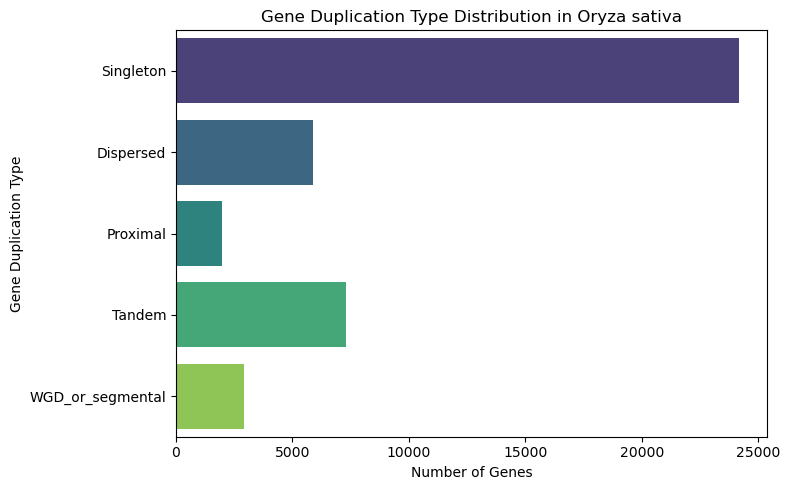

In [25]:
# hbar plot
labels = ["Singleton", "Dispersed", "Proximal", "Tandem", "WGD_or_segmental"]
counts = [len(subset) for subset in subsets]
plt.figure(figsize=(8, 5))
sns.barplot(x=counts, y=labels, palette="viridis")
plt.xlabel("Number of Genes")
plt.ylabel("Gene Duplication Type")
plt.title("Gene Duplication Type Distribution in Oryza sativa")
plt.tight_layout()
plt.show()

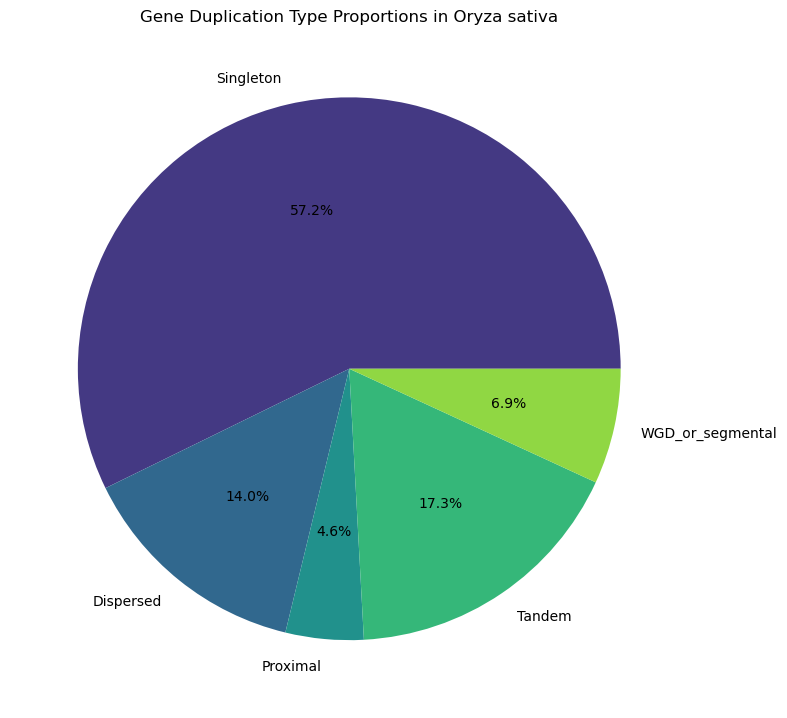

In [26]:
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(labels)))
plt.title("Gene Duplication Type Proportions in Oryza sativa")
plt.tight_layout()
plt.show()

In [6]:
with open('../anno_stat/Oryza_sativa_mrna.fa', 'r') as f:
    lines = f.readlines()
osat_mrna = []
for line in lines:
    line = line.strip()
    if line.startswith('>'):
        line = line.split(' ')[:3]
        line = [line[0].split(':')[1], line[1].split(':')[1], line[1].split(':')[1]]
        osat_mrna.append(line)

In [7]:
from tqdm import tqdm
for i in tqdm(range(len(data))):
    mrnaid = data[i][0]
    for j in range(len(osat_mrna)):
        if mrnaid == osat_mrna[j][0]:
            data[i].append(osat_mrna[j][1])
            break

  0%|          | 0/42220 [00:00<?, ?it/s]

100%|██████████| 42220/42220 [03:27<00:00, 203.88it/s]


In [8]:
df = pd.DataFrame(data, columns=['mRNA_ID', 'Type', 'gene_ID'])

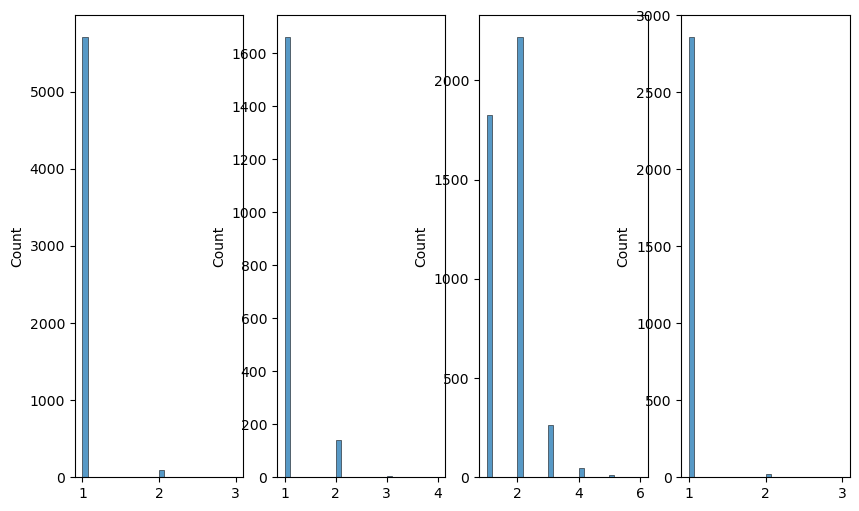

In [49]:
duptypes = ["Dispersed", "Proximal", "Tandem", "WGD_or_segmental"]
fig, ax = plt.subplots(1,4, figsize=(10, 6))
for dtype in duptypes:
    subset = df[df['Type'] == type_dict[dtype]]
    aggrecounts = subset.groupby('gene_ID').size()
    sns.histplot(aggrecounts, bins=30, kde=False, ax=ax[duptypes.index(dtype)])

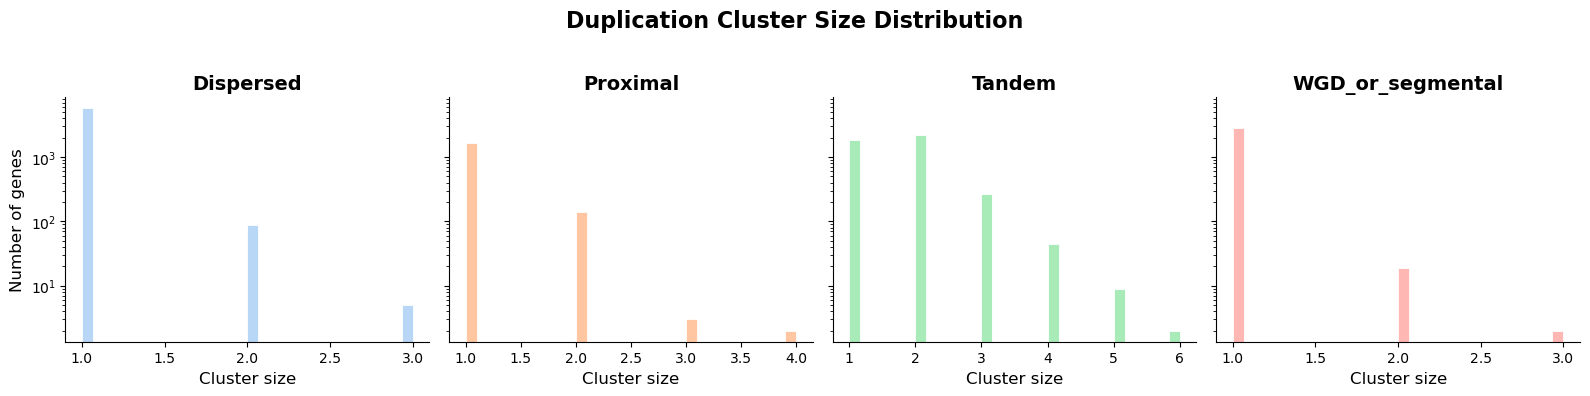

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

duptypes = ["Dispersed", "Proximal", "Tandem", "WGD_or_segmental"]
palette = sns.color_palette("pastel", len(duptypes))  # 马卡龙色系

fig, ax = plt.subplots(1, 4, figsize=(16, 4), sharey=True)  # sharey 对齐 y 轴

for i, dtype in enumerate(duptypes):
    subset = df[df['Type'] == type_dict[dtype]]
    aggrecounts = subset.groupby('gene_ID').size()
    
    sns.histplot(
        aggrecounts,
        bins=30,
        kde=False,
        ax=ax[i],
        color=palette[i],
        edgecolor='white'
    )
    
    ax[i].set_title(dtype, fontsize=14, weight='bold')
    ax[i].set_xlabel("Cluster size", fontsize=12)
    ax[i].set_yscale("log")
    if i == 0:
        ax[i].set_ylabel("Number of genes", fontsize=12)
    else:
        ax[i].set_ylabel("")
    
    ax[i].tick_params(axis='both', labelsize=10)
    sns.despine(ax=ax[i])  # 去掉顶部右侧边框

fig.suptitle("Duplication Cluster Size Distribution", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 留出 suptitle 空间
plt.show()


In [1]:
with open('../anno_stat/Oryza_sativa.IRGSP-1.0.41.gff3', 'r') as f:
    lines = f.readlines()
lines
        

['##gff-version 3\n',
 '##sequence-region   1 1 43270923\n',
 '##sequence-region   10 1 23207287\n',
 '##sequence-region   11 1 29021106\n',
 '##sequence-region   12 1 27531856\n',
 '##sequence-region   2 1 35937250\n',
 '##sequence-region   3 1 36413819\n',
 '##sequence-region   4 1 35502694\n',
 '##sequence-region   5 1 29958434\n',
 '##sequence-region   6 1 31248787\n',
 '##sequence-region   7 1 29697621\n',
 '##sequence-region   8 1 28443022\n',
 '##sequence-region   9 1 23012720\n',
 '##sequence-region   AC155918 1 32941\n',
 '##sequence-region   AC156495 1 88500\n',
 '##sequence-region   AC160949 1 128256\n',
 '##sequence-region   AC174930 1 15426\n',
 '##sequence-region   AP008246 1 206004\n',
 '##sequence-region   AP008247 1 157458\n',
 '##sequence-region   Mt 1 490520\n',
 '##sequence-region   Pt 1 134525\n',
 '##sequence-region   Syng_TIGR_002 1 14476\n',
 '##sequence-region   Syng_TIGR_004 1 19457\n',
 '##sequence-region   Syng_TIGR_005 1 21787\n',
 '##sequence-region   Syng

In [9]:
import pandas as pd

dup_df = pd.DataFrame(data, columns=['transcript_ID', 'dup_type', 'gene_ID'])
dup_df['dup_type'] = dup_df['dup_type'].astype(int)

# 如果有类型字典，比如
type_dict = {0:'Dispersed', 1:'Proximal', 2:'Tandem', 3:'WGD_or_segmental', 4:'Singleton'}
dup_df['dup_type_name'] = dup_df['dup_type'].map(type_dict)

import gffutils

# 创建 GFF 数据库
db = gffutils.create_db("../anno_stat/Oryza_sativa.IRGSP-1.0.41.gff3", dbfn="anno.db", force=True, merge_strategy='merge')

# 把 gene/mRNA 信息读成 DataFrame
records = []
for gene in db.features_of_type("gene"):
    for mrna in db.children(gene, featuretype="mRNA"):
        records.append({
            'gene_ID': gene.id,
            'transcript_ID': mrna.id,
            'chrom': gene.chrom,
            'start': gene.start,
            'end': gene.end,
            'strand': gene.strand
        })

anno_df = pd.DataFrame(records)

merged_df = pd.merge(dup_df, anno_df, on='transcript_ID', how='left')

"""
dup_summary = merged_df.groupby('dup_type_name')['gene_ID'].nunique()
print(dup_summary)

chrom_dup = merged_df.groupby(['chrom','dup_type_name'])['gene_ID'].nunique().unstack(fill_value=0)

import seaborn as sns
import matplotlib.pyplot as plt

chrom_dup.plot(kind='bar', stacked=True, figsize=(10,5), colormap='pastel')
plt.ylabel("Number of duplicated genes")
plt.show()
"""


'\ndup_summary = merged_df.groupby(\'dup_type_name\')[\'gene_ID\'].nunique()\nprint(dup_summary)\n\nchrom_dup = merged_df.groupby([\'chrom\',\'dup_type_name\'])[\'gene_ID\'].nunique().unstack(fill_value=0)\n\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\nchrom_dup.plot(kind=\'bar\', stacked=True, figsize=(10,5), colormap=\'pastel\')\nplt.ylabel("Number of duplicated genes")\nplt.show()\n'

In [10]:
gff_df = pd.DataFrame({
    'seqid': merged_df['chrom'],
    'source': 'custom_dup',              # 你可以自定义
    'type': 'mRNA',                       # 或 gene / exon，视情况
    'start': merged_df['start'],
    'end': merged_df['end'],
    'score': '.',
    'strand': merged_df['strand'],
    'phase': '.',
    'attributes': merged_df.apply(lambda row: f"ID={row['transcript_ID']};Parent={row['gene_ID_x']};dup_type={row['dup_type_name']}", axis=1)
})

gff_df.to_csv("merged_with_dup.gff3",
              sep='\t',
              header=False,
              index=False,
              quoting=3)   # quoting=3 保持原始字符串


In [11]:
import pandas as pd

# 原始 GFF3
cols = ['seqid','source','type','start','end','score','strand','phase','attributes']
gff_df = pd.read_csv("merged_with_dup.gff3", sep='\t', comment='#', names=cols, dtype=str)
gff_file = "../anno_stat/Oryza_sativa.IRGSP-1.0.41.gff3"


gff_ref = pd.read_csv(gff_file, sep='\t', comment='#', names=cols, dtype=str)
gff_ref['gene_ID'] = gff_ref['attributes'].str.extract(r'ID=([^;]+)')
gff_ref['transcript_ID'] = gff_ref['attributes'].str.extract(r'ID=([^;]+)')

# 将 start/end/strand 转成整数或原始字符串
gff_ref['start'] = pd.to_numeric(gff_ref['start'], errors='coerce')
gff_ref['end'] = pd.to_numeric(gff_ref['end'], errors='coerce')



In [12]:
df = gff_df
df['transcript_ID'] = df['attributes'].str.extract(r'ID=([^;]+)')
df['Parent'] = df['attributes'].str.extract(r'Parent=([^;]+)')
df['dup_type_name'] = df['attributes'].str.extract(r'dup_type=([^;]+)')
#dup_df[['transcript_ID','dup_type_name']]


In [13]:
import pandas as pd

def add_dup_to_gff(original_gff, dup_df, output_gff):
    """
    original_gff : str : 原始 GFF3 文件路径
    dup_df       : pd.DataFrame : 包含列 ['transcript_ID','dup_type_name'] 或 ['gene_ID','transcript_ID','dup_type_name']
    output_gff   : str : 输出 GFF3 文件路径
    """
    # -----------------------------
    # 1️⃣ 读取原始 GFF3
    # -----------------------------
    cols = ['seqid','source','type','start','end','score','strand','phase','attributes']
    gff_ref = pd.read_csv(original_gff, sep='\t', comment='#', names=cols, dtype=str)
    
    # 解析 gene_ID 和 transcript_ID
    gff_ref['gene_ID'] = gff_ref['attributes'].str.extract(r'Parent=([^;]+)')
    gff_ref['transcript_ID'] = gff_ref['attributes'].str.extract(r'transcript:([^;]+)')
    
    #dup_df['dup_type_name'] = dup_df['dup_type'].astype(str)
    
    # -----------------------------
    # 2️⃣ 合并 duplication 信息
    # -----------------------------
    # 保证 dup_df 至少有 transcript_ID 和 dup_type_name
    if 'dup_type_name' not in dup_df.columns:
        raise ValueError("dup_df 必须包含 'dup_type_name' 列")
    
    gff_ref.dropna(subset=['transcript_ID'], inplace=True)
    
    gff_merged = pd.merge(
        gff_ref,
        dup_df[['transcript_ID','dup_type_name']],
        on='transcript_ID')
    
    #print(gff_merged['dup_type_name'])
    #gff_merged['dup_type_name'] = gff_merged['dup_type_name']
    gff_merged.dropna(subset=['dup_type_name'], inplace=True)
    #gff_merged['type'] = gff_merged['dup_type_name']

    
    # -----------------------------
    # 3️⃣ attributes 构建
    # -----------------------------
    def build_attributes(row):
        # 如果 transcript_ID 不为空
        if pd.notnull(row['transcript_ID']):
            parent = row['gene_ID'] if pd.notnull(row['gene_ID']) else 'NA'
            return f"ID={row['transcript_ID']};Parent={parent};dup_type={row['dup_type_name']}"
        else:
            return row['attributes']
    
    gff_merged['attributes_new'] = gff_merged.apply(build_attributes, axis=1)
    
    # -----------------------------
    # 4️⃣ 处理坐标及空值
    # -----------------------------
    for col in ['start','end']:
        gff_merged[col] = pd.to_numeric(gff_merged[col], errors='coerce').fillna(0).astype(int)
    gff_merged['score'] = gff_merged['score'].replace('', '.')
    gff_merged['phase'] = gff_merged['phase'].replace('', '.')
    
    # -----------------------------
    # 5️⃣ 写回 GFF3
    # -----------------------------
    final_gff = gff_merged[['seqid','source','type','start','end','score','strand','phase','attributes_new']]
    final_gff = final_gff.rename(columns={'attributes_new':'attributes'})
    
    final_gff.to_csv(output_gff, sep='\t', header=False, index=False, quoting=3)
    print(f"✅ GFF3 saved: {output_gff}")

# -----------------------------
# 使用示例
# -----------------------------
# 原始 GFF3
original_gff = "../anno_stat/Oryza_sativa.IRGSP-1.0.41.gff3"

# duplication DataFrame
# 必须至少有 'transcript_ID','dup_type_name' 列


# 输出文件
output_gff = "merged_with_dup_refcoords.gff3"

# 调用函数
add_dup_to_gff(original_gff, gff_df, output_gff)


✅ GFF3 saved: merged_with_dup_refcoords.gff3


In [49]:
gff_df['transcript_ID'] = gff_df['transcript_ID'].str.replace('.','-')

In [3]:
!agat_sp_statistics.pl --gff ./merged_with_dup_refcoords.gff3 -o merged_stats.txt

Using standard /root/micromamba/envs/maker_env/lib/perl5/site_perl/auto/share/dist/AGAT/agat_config.yaml file
Reading file ./merged_with_dup_refcoords.gff3

 ------------------------------------------------------------------------------
|   Another GFF Analysis Toolkit (AGAT) - Version: v1.3.0                      |
|   https://github.com/NBISweden/AGAT                                          |
|   National Bioinformatics Infrastructure Sweden (NBIS) - www.nbis.se         |
 ------------------------------------------------------------------------------
                                        
                                       
                          ------ Start parsing ------                           
-------------------------- parse options and metadata --------------------------
=> Accessing the feature_levels YAML file
Using standard /root/micromamba/envs/maker_env/lib/perl5/site_perl/auto/share/dist/AGAT/feature_levels.yaml file
=> Attribute used to group features when n

In [14]:
import pandas as pd

# 读取 GFF 文件（跳过注释行）
#gff_file = "dispersed.gff3" # proximal.gff3  tandem.gff3  wgdseg.gff3 singleton.gff3
gff_file = "singleton.gff3"

cols = ["seqid", "source", "type", "start", "end", "score", "strand", "phase", "attributes"]
df = pd.read_csv(
    gff_file, sep="\t", comment="#", names=cols, header=None
)

# 计算长度
df["length"] = df["end"] - df["start"] + 1

# 按 type 统计最小/最大/平均/中位数
stats = df.groupby("type")["length"].agg(
    min_length="min",
    max_length="max",
    mean_length="mean",
    median_length="median"
).reset_index()

# 输出结果
stats.to_csv("gff_type_stats.csv", index=False)
print(stats)

              type  min_length  max_length  mean_length  median_length
0              CDS           1        3645   241.820603          133.0
1             exon           6        6191   315.687488          162.0
2   five_prime_UTR           1        3024   149.324888          102.0
3             mRNA         231       29706  3260.417643         2930.0
4  three_prime_UTR           1        3539   288.835658          261.0
